In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('..')

In [3]:
data = pd.read_csv('data_ptb-xl/train.csv')
data.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,preprocessed_report
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,sinus rhythm peripheral low voltage
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,sinus bradycardia otherwise normal ecg
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,sinus rhythm normal ecg
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,sinus rhythm normal ecg
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,sinus rhythm normal ecg


(0.0, 100.0)

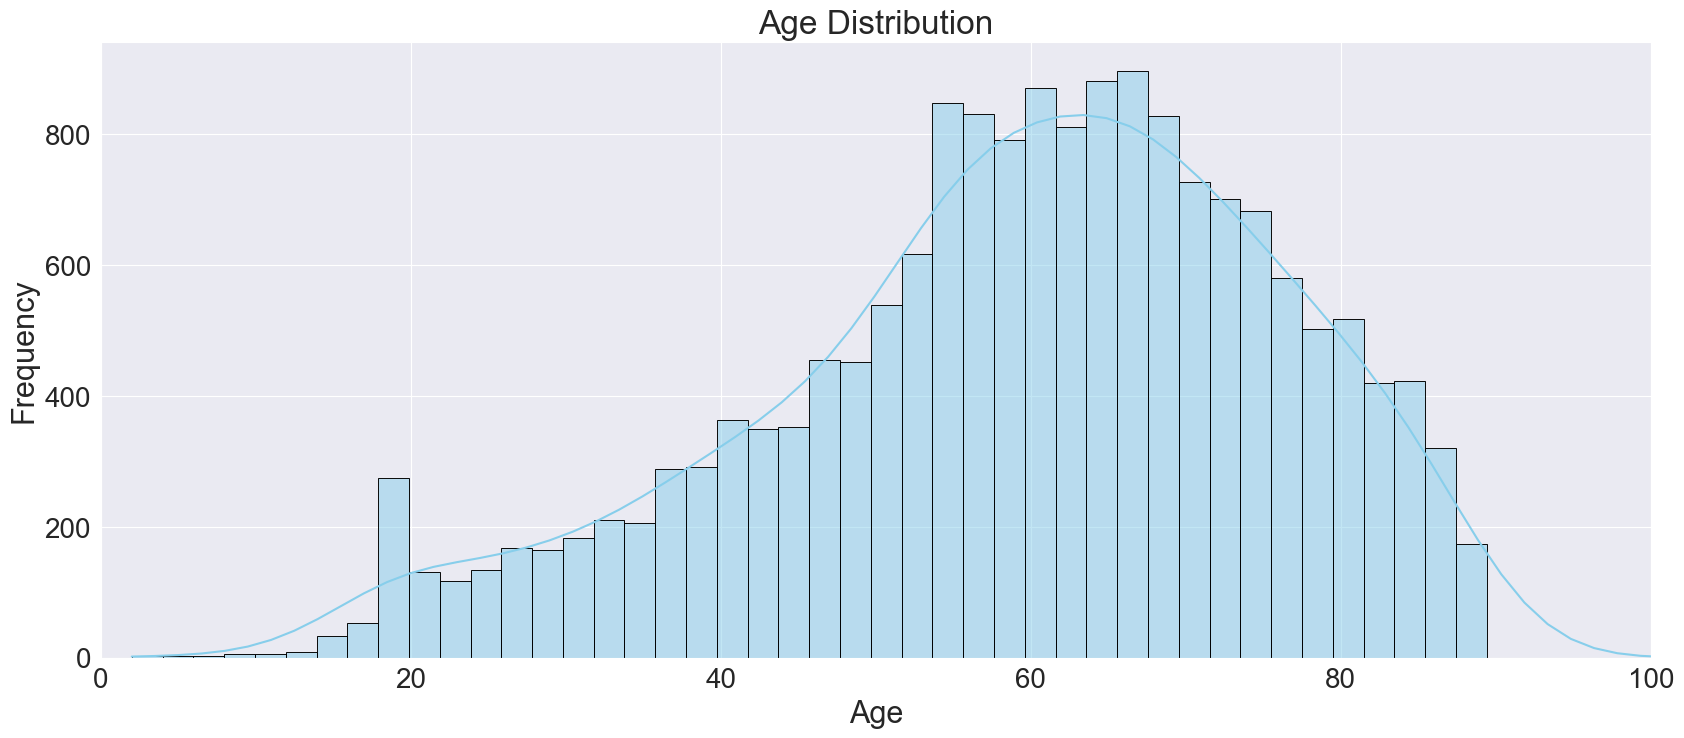

In [4]:
plt.figure(figsize=(20, 8))
sns.histplot(data['age'], bins=150, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=24)
plt.xlabel('Age', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 100])

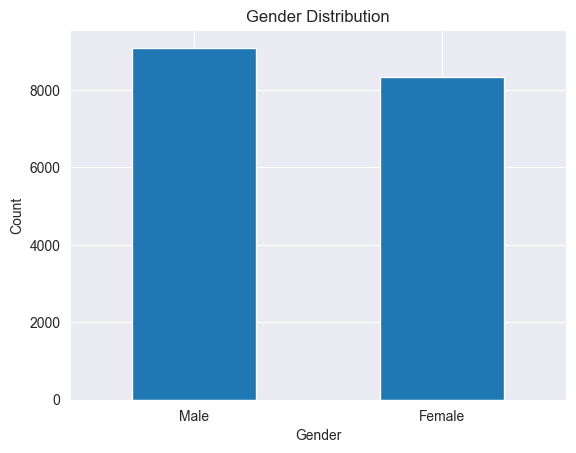

In [5]:
gender_counts = data['sex'].value_counts()

gender_counts.plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)

plt.show()

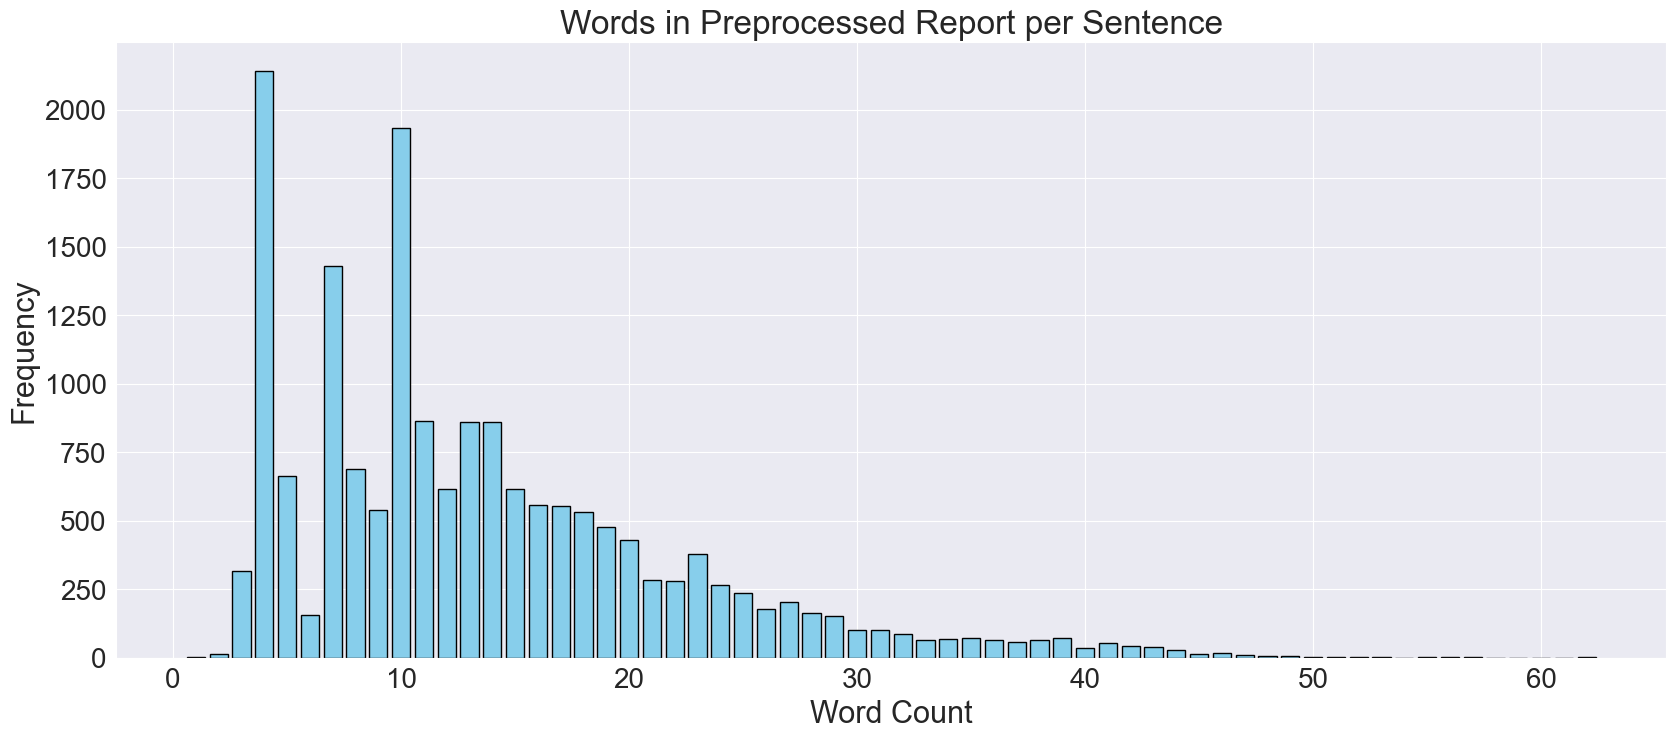

In [6]:
word_counts = data['preprocessed_report'].apply(lambda x: len(str(x).split()))

max_count = word_counts.max()
word_count_frequency = word_counts.value_counts().sort_index()
full_range_index = np.arange(1, max_count + 1)
full_word_count_frequency = word_count_frequency.reindex(full_range_index, fill_value=0)

plt.figure(figsize=(20, 8))
plt.bar(full_word_count_frequency.index, full_word_count_frequency.values, color='skyblue', edgecolor='black')
plt.title('Words in Preprocessed Report per Sentence', fontsize=24)
plt.xlabel('Word Count', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [7]:
print(f"German Report:  {data.loc[data['ecg_id'] == 97].report.values[0]}")
print(f"Swedish Report: {data.loc[data['ecg_id'] == 168].report.values[0]}")
print(f"English Report: {data.loc[data['ecg_id'] == 276].report.values[0]}")

German Report:  sinusrhythmus linkstyp sonst normales ekg
Swedish Report: sinusrytm vÄnster el-axel st-t sÄnkning, sÅsom vid    anterolateral ischemi eller vÄnster belastning
English Report: sinus rhythm. minor non-specific t wave flattening in limb leads and    v5,6.


In [8]:
data.iloc[data['report'].apply(lambda x: len(str(x).split())).argmax()]['report']

'sinus rhythm. r-s transition zone in v leads displaced to the left. voltages are high in limb leads suggesting lvh. st segments are depressed in i, avl, v6. t waves are inverted in i, ii, avl, v2-6. this may be due to lv strain or ischaemia. prolonged qt, Edit: INJAS, INJAL, Sokolow 3,1 aber sehr hohe Amplituden in Standardableitungen(INJAS, INJAL, LVH 100)'

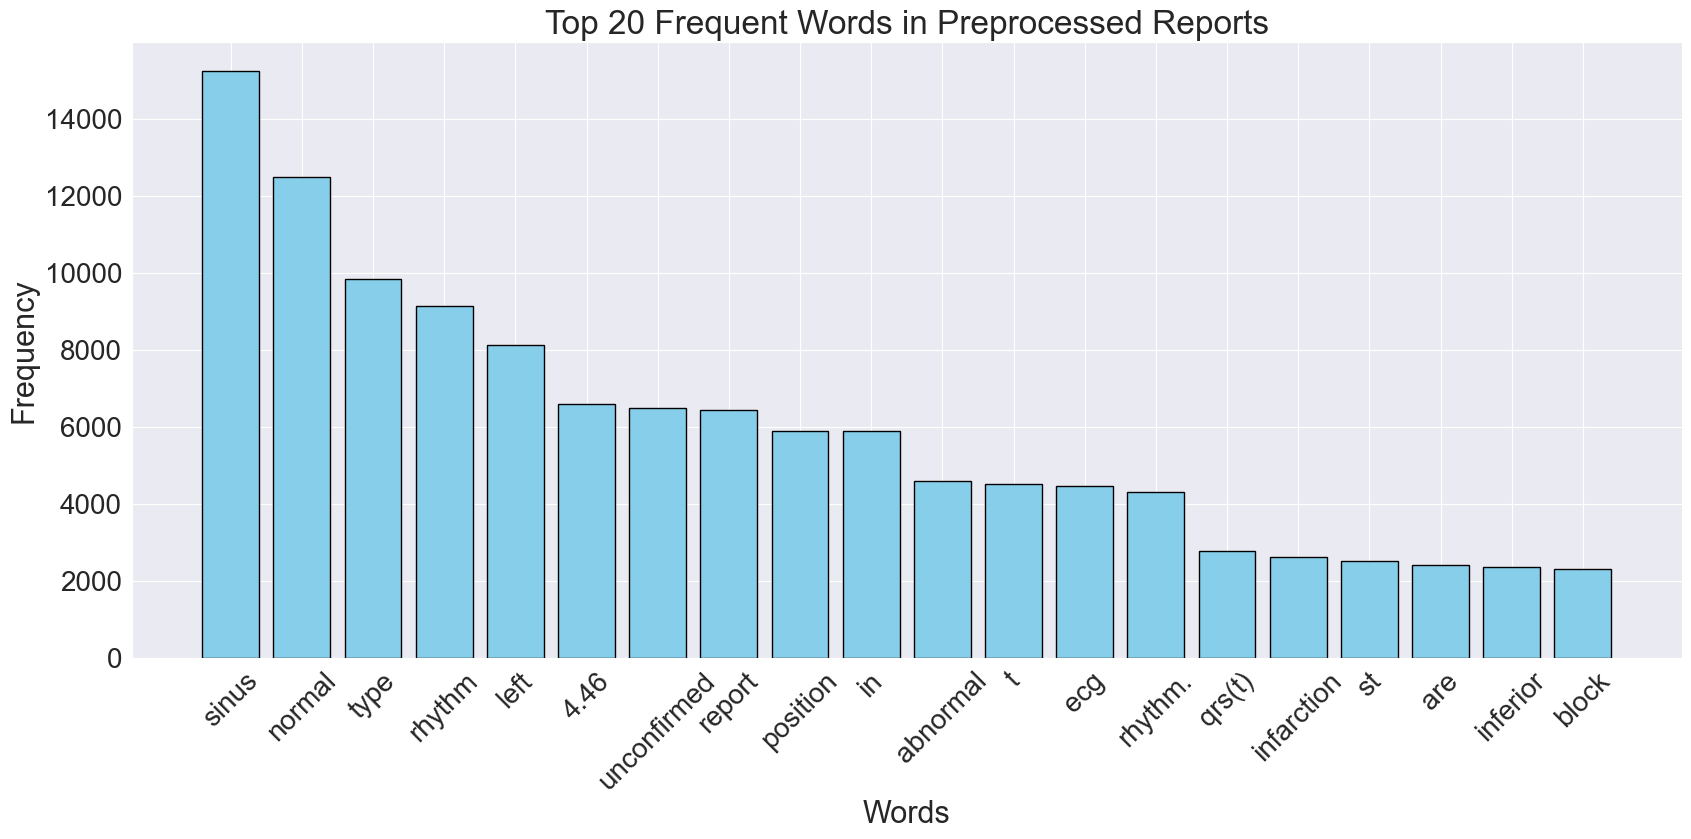

In [9]:
word_counts = Counter()

data['preprocessed_report'].str.split().apply(word_counts.update)
most_common_words = word_counts.most_common(20)

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(20, 8))
plt.bar(words, frequencies, color='skyblue', edgecolor='black')
plt.title('Top 20 Frequent Words in Preprocessed Reports', fontsize=24)
plt.xlabel('Words', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# check report

In [10]:
data

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,preprocessed_report
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,sinus rhythm peripheral low voltage
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,sinus bradycardia otherwise normal ecg
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,sinus rhythm normal ecg
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,sinus rhythm normal ecg
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,sinus rhythm normal ecg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,21832,7954.0,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-30 14:14:25,...,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21832_lr,records500/21000/21832_hr,sinus rhythm left type peripheral low voltage ...
17413,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,ventricular extrasystole(s) left sinus tachyca...
17414,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,sinus rhythm position type normal qrs(t) abnor...
17415,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,sinus rhythm position type normal t abnormal i...


In [11]:
data.validated_by_human.value_counts()

validated_by_human
True     11674
False     5743
Name: count, dtype: int64

In [12]:
data.validated_by.value_counts()

validated_by
0.0     4936
1.0     3370
2.0      439
3.0      135
4.0       88
6.0       75
7.0       64
5.0       52
8.0       30
9.0        6
10.0       5
Name: count, dtype: int64

# Loss functions

In [13]:
logits = np.linspace(-10, 10, 400)

true_labels_0 = np.zeros_like(logits)
true_labels_1 = np.ones_like(logits)

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bce_with_logits_loss(logits, true_labels):
    return -true_labels * np.log(sigmoid(logits)) - (1 - true_labels) * np.log(1 - sigmoid(logits))

loss_y_0 = bce_with_logits_loss(logits, true_labels_0)
loss_y_1 = bce_with_logits_loss(logits, true_labels_1)

In [15]:
def simplified_challengeloss(L, P):
    weights = 1

    N = L + P - L * P + 1e-6  # Add small constant to prevent division by zero
    C = L * P / N * weights
    return C

challenge_loss_y_0 = np.array([simplified_challengeloss(0, sigmoid(logit)) for logit in logits])
challenge_loss_y_1 = np.array([simplified_challengeloss(1, sigmoid(logit)) for logit in logits])

In [16]:
def sparsity_loss(p):
    return -4 * p * (p - 1)

sparsity_loss_values = np.array([sparsity_loss(sigmoid(logit)) for logit in logits])

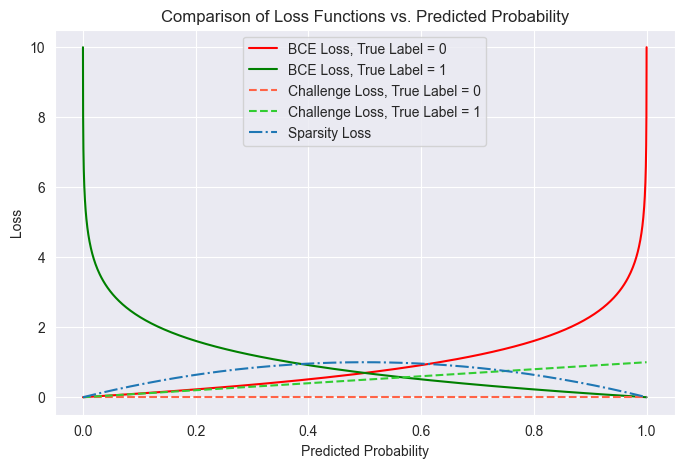

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(sigmoid(logits), loss_y_0, label='BCE Loss, True Label = 0', color='red')
plt.plot(sigmoid(logits), loss_y_1, label='BCE Loss, True Label = 1', color='green')
plt.plot(sigmoid(logits), challenge_loss_y_0, label='Challenge Loss, True Label = 0', linestyle='--', color='tomato')
plt.plot(sigmoid(logits), challenge_loss_y_1, label='Challenge Loss, True Label = 1', linestyle='--', color='limegreen')
plt.plot(sigmoid(logits), sparsity_loss_values, label='Sparsity Loss', linestyle='-.')
plt.title('Comparison of Loss Functions vs. Predicted Probability')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()